# Kuis 1 Machine Learning

**DESY AYURIANTI**

**TI 3E / 07**

**2141720119**

# Persiapan Dataset MNIST 

* Unduh datset MNIST

In [1]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# memahami struktur dari dataset MNIST
mnist.keys()

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

# Kuis Nomor 1

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset
MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!


* Memastikan jumlah data setiap label angka (0-9)

Jumlah data label ke-0: 6903
Jumlah data label ke-1: 7877
Jumlah data label ke-2: 6990
Jumlah data label ke-3: 7141
Jumlah data label ke-4: 6824
Jumlah data label ke-5: 6313
Jumlah data label ke-6: 6876
Jumlah data label ke-7: 7293
Jumlah data label ke-8: 6825
Jumlah data label ke-9: 6958


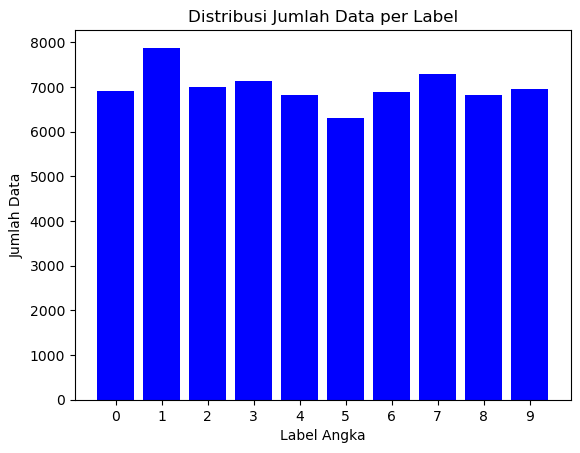

In [2]:
import pandas as pd #manipulasi dan analisi data
import numpy as np #komputasi numerik
import matplotlib.pyplot as plt #membuat visualisasi data

# Menghitung jumlah data untuk setiap label (0-9)
jumlahDataTiapLabel = np.bincount(mnist.target.astype(int))

# Perulangan untuk menampilkan jumlah data setiap label angka (0-9)
for i in range(10):
    print(f"Jumlah data label ke-{i}: {jumlahDataTiapLabel[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), jumlahDataTiapLabel, tick_label=range(10), color='blue')#membuat diagram batang
plt.xlabel('Label Angka')#memberi label pada sumbu x
plt.ylabel('Jumlah Data')#memberi label pada sumbu y
plt.title('Distribusi Jumlah Data per Label')#memberi judul pada plot
plt.show()#menampilkan visualisasi data 


* Mengecek Keseimbangan Data

In [3]:
# Cek apakah data sudah seimbang atau tidak

max_count = np.max(jumlahDataTiapLabel)#mencari nilai maksimum dari jumlah data tiap tabel
min_count = np.min(jumlahDataTiapLabel)#mencari nilai minimum dari jumlah data tiap tabel
balance_ratio = max_count / min_count #hitung rasio keseimbangan 

if balance_ratio < 1.5:#cek rasio kesimbangan 
    print("Data MNIST seimbang.") #akan tampil jika rasio kurang dari 1,5
else:
    print("Data MNIST tidak seimbang.")#akan tampil jika lebih dari 1,5

Data MNIST seimbang.


Data MNIST sudah seimbang yang sudah dibuktikan berdasarkan rasio antara jumlah data terbanyak dan terkecil dalam dataset. Jika rasio kurang dari nilai ambang sebesar 1.5 maka dataset sudah seimbang, jika lebih dari itu maka dataset tidak seimbang 

# Kuis Nomor 2

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.


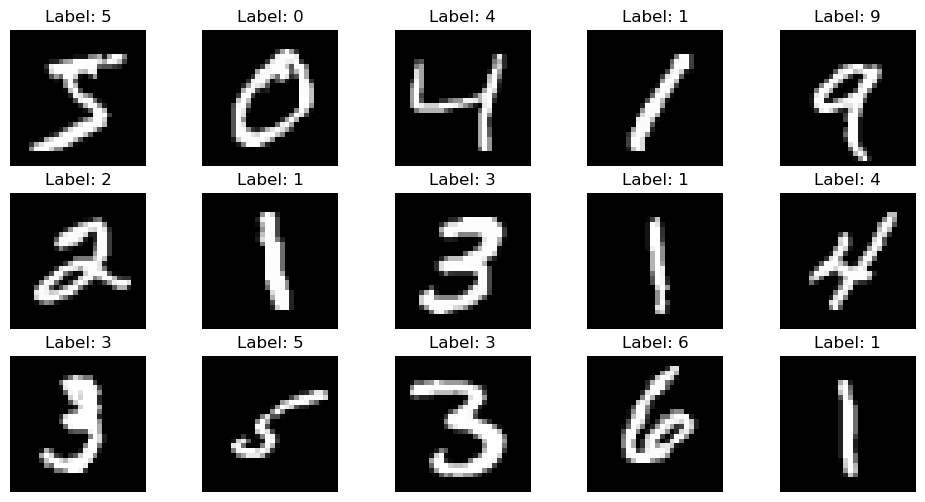

In [4]:
# Mengambil data dan target dari dataset MNIST
X= mnist.data.to_numpy() #ambil data dari objek dataset dan dikonversi menjadi array
y= mnist.target.astype(int) #ambil target dari dataset dan dikonversi menjadi int

# Menampilkan 15 Citra Pertama dari sataset
plt.figure(figsize=(12, 6))#membuat gambar untuk menampung plot gambar digit
for i in range(15): #iterasi untuk menampilkan 15 gambar pertama 
    plt.subplot(3, 5, i + 1) #atur kotak untuk menampilkan gambar, 3 baris 5 kolom dan i+1 untuk nomor kotak yang akan digunakan
    plt.imshow(X[i].reshape(28, 28), cmap="gray") #menampilkan gambar, reshape untuk mengubah matriks data menjadi gamabr 28x28 
    plt.title(f"Label: {y[i]}")#memberi judul pada gamabar sesuai dengan label
    plt.axis("off")#menghilangkan sumbu x dan y
plt.show()#menampikan gamar 

# Kuis Nomor 3 

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    * Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    * Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.


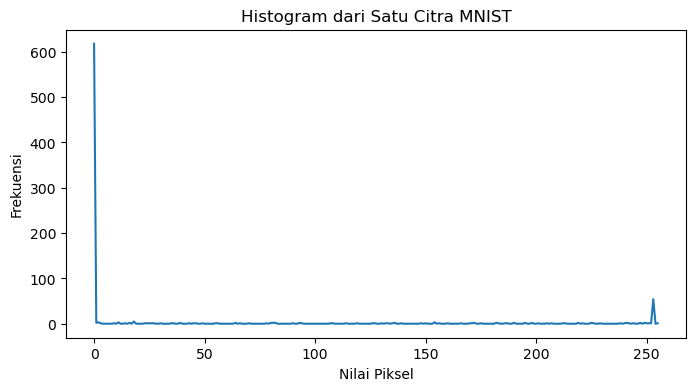

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Ambil salah satu citra sebagai contoh
sample_image = X[0].reshape(28, 28)  # Ambil citra pertama

# Fungsi untuk menghitung histogram citra
def compute_histogram(image):
    # Hitung histogram citra dengan 256 bin (untuk gambar grayscale)
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    return hist

# Hitung histogram dari citra contoh
sample_histogram = compute_histogram(sample_image)

# Tampilkan histogram dari citra pertama
plt.figure(figsize=(8, 4))#membuat gambar ukuran 8x4 inch untuk menampung plot histogram
plt.plot(sample_histogram)#menggambar plot
plt.title("Histogram dari Satu Citra MNIST")#memberi judul pada gambar plot
plt.xlabel("Nilai Piksel")#memberi judul sumbu x
plt.ylabel("Frekuensi")#memberi judul sumbu y
plt.show()#menampilkan plot histogram

# Kuis Nomor 4 

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [6]:
from sklearn.model_selection import train_test_split #untuk membagi data menjadi data latih dan data uji

# Pisahkan fitur (X) dan target (y)
X= mnist.data
y= mnist.target

# Bagi dataset menjadi data latih dan data uji dengan rasio yang berbeda
# 70:30
X_train_1, X_test_1, y_train_1, y_test_1= train_test_split(X, y, test_size=0.3, random_state=42)
# Tampilkan ukuran setiap bagian data
print("Rasio 70:30")
print("Data Training:", X_train_1.shape, y_train_1.shape)
print("Data Testing:", X_test_1.shape, y_test_1.shape)
print("")

# 80:20
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)
print("Rasio 80:20")
print("Data Training:", X_train_2.shape, y_train_2.shape)
print("Data Testing:", X_test_2.shape, y_test_2.shape)
print("")

# 90:10
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.1, random_state=42)
print("Rasio 90:10")
print("Data Training:", X_train_3.shape, y_train_3.shape)
print("Data Testing:", X_test_3.shape, y_test_3.shape)
print("")

Rasio 70:30
Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)

Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)

Rasio 90:10
Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)



# Kuis Nomor 5

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
    * Anda diperbolehkan untuk melakukan tunning parameter.
    * Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.


**SVM**

* Split Data 70:30

In [7]:
# Untuk data (70 : 30)
from sklearn.preprocessing import StandardScaler #ubah distribusi data untuk meningkatkan performa model
from sklearn.svm import SVC #pelatihan data 
from sklearn.metrics import accuracy_score #untuk evaluasi model 

# Inisialisasi dan pelatihan model SVM
scaler1 = StandardScaler()
X_train_1 = scaler1.fit_transform(X_train_1)#ubah skala dan hitung statistik data latih X_train_1
X_test_1 = scaler1.transform(X_test_1)#ubah skala data uji berdasarkan statistik yang telah dihitung dari data latih 

 
svm_classifier_1 = SVC(kernel='linear', C=1.0, random_state=42)#inisialisasi model SVM dengan kernel linear 
svm_classifier_1.fit(X_train_1, y_train_1)#pelatihan data latih

# Prediksi pada data pengujian
y_pred_1 = svm_classifier_1.predict(X_test_1)

#Evaluasi model 
accuracy_1 = accuracy_score(y_test_1, y_pred_1)#ukur akurasi model SVM 
print(f'Akurasi SVM (70:30): {accuracy_1}= {accuracy_1 * 100:.2f}%')#cetak persentasi nilai akurasi 

Akurasi SVM (70:30): 0.92= 92.00%


* Split Data 80:20

In [8]:
# Untuk data (80 : 20)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi dan pelatihan model SVM
scaler_2 = StandardScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler_2.transform(X_test_2)

svm_classifier_2 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier_2.fit(X_train_2, y_train_2)

# Prediksi pada data pengujian
y_pred_2 = svm_classifier_2.predict(X_test_2)

#Evaluasi model 
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f'Akurasi SVM (80:20): {accuracy_2}= {accuracy_2*100:.2f}%')

Akurasi SVM (80:20): 0.9210714285714285= 92.11%


* Split Data 90:10

In [9]:
# Untuk data (90 : 10)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inisialisasi dan pelatihan model SVM
scaler3 = StandardScaler()
X_train_3 = scaler3.fit_transform(X_train_3)
X_test_3 = scaler3.transform(X_test_3)

svm_classifier_3 = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier_3.fit(X_train_3, y_train_3)

# Prediksi pada data pengujian
y_pred_3 = svm_classifier_3.predict(X_test_3)

#Evaluasi model 
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
print(f'Akurasi SVM (90:10): {accuracy_3}= {accuracy_3 * 100:.2f}%')

Akurasi SVM (90:10): 0.923= 92.30%


**Naive Bayes**

* Data 70:30

In [10]:
from sklearn.naive_bayes import GaussianNB #membuat model Naive Bayes denan distribusi gaussian 
from sklearn.metrics import accuracy_score #untuk mengukur akurasi model 


# Inisialisasi dan pelatihan model Naive Bayes
gnb1 = GaussianNB() #instance model Naive Bayes 
gnb1.fit(X_train_1, y_train_1) #pelatihan model 

# Prediksi pada data pengujian
y_pred_nb_1 = gnb1.predict(X_test_1)

# Evaluasi model Naive Bayes
accuracy_nb_1 = accuracy_score(y_test_1, y_pred_nb_1)#ukur akurasi model 
print(f'Akurasi Naive Bayes (70:30):  {accuracy_nb_1}= {accuracy_nb_1* 100:.2f}%')#menampilkan persentase akursi model 

Akurasi Naive Bayes (70:30):  0.5264285714285715= 52.64%


* Data 80:20 

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Inisialisasi dan pelatihan model Naive Bayes
gnb2 = GaussianNB()
gnb2.fit(X_train_2, y_train_2)

# Prediksi pada data pengujian
y_pred_nb_2 = gnb2.predict(X_test_2)

# Evaluasi model Naive Bayes
accuracy_nb_2 = accuracy_score(y_test_2, y_pred_nb_2)
print(f'Akurasi Naive Bayes (80:20):  {accuracy_nb_2}= {accuracy_nb_2* 100:.2f}%')


Akurasi Naive Bayes (80:20):  0.525= 52.50%


* Data 90:10

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


# Inisialisasi dan pelatihan model Naive Bayes
gnb3 = GaussianNB()
gnb3.fit(X_train_3, y_train_3)

# Prediksi pada data pengujian
y_pred_nb_3 = gnb3.predict(X_test_3)

# Evaluasi model Naive Bayes
accuracy_nb_3 = accuracy_score(y_test_3, y_pred_nb_3)
print(f'Akurasi Naive Bayes (90:10):  {accuracy_nb_3}= {accuracy_nb_3* 100:.2f}%')


Akurasi Naive Bayes (90:10):  0.5371428571428571= 53.71%


# Kuis Nomor 6

6. Evaluasi model yang Anda buat terhadap data training dan data testing.
    * Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
    * Gunakan fungsi classification_report untuk mengetahui performa model secara holistik.
    * Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

**SVM**

* Data 70:30

In [13]:
#accuracy_score-> hitung akurasi 
#classification_report-> buat laporan klasifikasi 
#confusion_matrix->hitung confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

# Evaluasi model SVM (kernel linear) pada data pelatihan
y_train_pred_svm_linear_1 = svm_classifier_1.predict(X_train_1)#prediksi pada data latih 
accuracy_train_svm_linear_1 = accuracy_score(y_train_1, y_train_pred_svm_linear_1)#hitung akurasi SVM dg membandingkan hasil prediksi dan data latih

# Evaluasi model SVM (kernel linear) pada data pengujian
accuracy_test_svm_linear_1 = accuracy_score(y_test_1, y_pred_1)

# Classification Report untuk model SVM (kernel linear) pada data pengujian
report_svm_linear_1 = classification_report(y_test_1, y_pred_1)

# Confusion Matrix untuk model SVM (kernel linear) pada data pengujian
confusion_matrix_svm_linear_1 = confusion_matrix(y_test_1, y_pred_1)

# Cetak hasil akurasi dalam persentase 
print(f'Akurasi SVM (70:30) (data pelatihan): {accuracy_train_svm_linear_1}= {accuracy_train_svm_linear_1 * 100:.2f}%')
print(f'Akurasi SVM (70:30) (data pengujian): {accuracy_test_svm_linear_1}= {accuracy_test_svm_linear_1*100:.2F}%')
print("\nClassification Report SVM (70:30):")
print(report_svm_linear_1) #cetak report model SVM 


Akurasi SVM (70:30) (data pelatihan): 0.987265306122449= 98.73%
Akurasi SVM (70:30) (data pengujian): 0.92= 92.00%

Classification Report SVM (70:30):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2058
           1       0.95      0.98      0.96      2364
           2       0.89      0.90      0.89      2133
           3       0.88      0.91      0.89      2176
           4       0.91      0.94      0.93      1936
           5       0.89      0.88      0.89      1915
           6       0.96      0.94      0.95      2088
           7       0.94      0.94      0.94      2248
           8       0.92      0.85      0.88      1992
           9       0.92      0.88      0.90      2090

    accuracy                           0.92     21000
   macro avg       0.92      0.92      0.92     21000
weighted avg       0.92      0.92      0.92     21000




Confusion Matrix SVM (70:30):


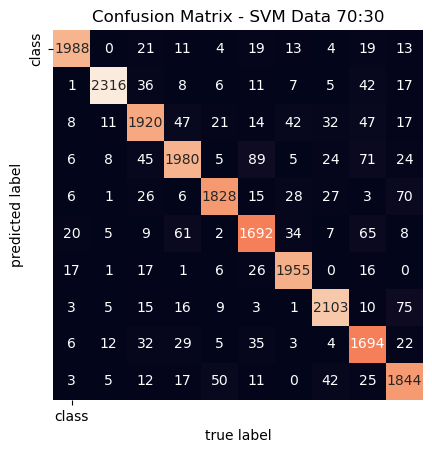

In [14]:
import seaborn as sns #untuk menghasilkan visualisasi confusion matrix

# Bentuk confusion matrix SVM 
print("\nConfusion Matrix SVM (70:30):")
cnf_svm_1 = confusion_matrix_svm_linear_1 
sns.heatmap(cnf_svm_1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)#membuat heatmap dari confusion matrix
            #square=True->heatmap dengan persegi
            #annot=True->menampilkan nilai dalam sel heatmap 
            #fmt='d'->atur format nilai dalam bil buat


plt.xlabel('true label')#memberi label pada sumbu x
plt.ylabel('predicted label')#memberi label pada sumbu y
plt.title('Confusion Matrix - SVM Data 70:30')#memberi judul pada heatmap
plt.show()#menampilan heatmap 

* Data 80:20

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model SVM (kernel linear) pada data pelatihan
y_train_pred_svm_linear_2 = svm_classifier_2.predict(X_train_2)
accuracy_train_svm_linear_2 = accuracy_score(y_train_2, y_train_pred_svm_linear_2)

# Evaluasi model SVM (kernel linear) pada data pengujian
accuracy_test_svm_linear_2 = accuracy_score(y_test_2, y_pred_2)

# Classification Report untuk model SVM (kernel linear) pada data pengujian
report_svm_linear_2 = classification_report(y_test_2, y_pred_2)

# Confusion Matrix untuk model SVM (kernel linear) pada data pengujian
confusion_matrix_svm_linear_2 = confusion_matrix(y_test_2, y_pred_2)

print(f'Akurasi SVM (kernel linear) (data pelatihan): {accuracy_train_svm_linear_2}= {accuracy_train_svm_linear_2* 100:.2f}%')
print(f'Akurasi SVM (kernel linear) (data pengujian): {accuracy_test_svm_linear_2}= {accuracy_test_svm_linear_2* 100:.2f}%')
print("\nClassification Report SVM (kernel linear):")
print(report_svm_linear_2)


Akurasi SVM (kernel linear) (data pelatihan): 0.9841428571428571= 98.41%
Akurasi SVM (kernel linear) (data pengujian): 0.9210714285714285= 92.11%

Classification Report SVM (kernel linear):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.98      0.97      1600
           2       0.89      0.92      0.90      1380
           3       0.88      0.91      0.90      1433
           4       0.90      0.94      0.92      1295
           5       0.87      0.88      0.88      1273
           6       0.96      0.93      0.94      1396
           7       0.95      0.93      0.94      1503
           8       0.92      0.85      0.88      1357
           9       0.92      0.89      0.91      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000




Confusion Matrix SVM (80:20):


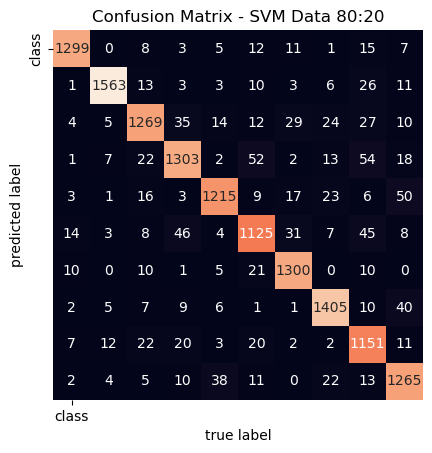

In [16]:
import seaborn as sns

# Bentuk confusion matrix SVM
print("\nConfusion Matrix SVM (80:20):")
cnf_svm_2 = confusion_matrix_svm_linear_2
sns.heatmap(cnf_svm_2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix - SVM Data 80:20')
plt.show()

* Data 90:10

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model SVM (kernel linear) pada data pelatihan
y_train_pred_svm_linear_3 = svm_classifier_3.predict(X_train_3)
accuracy_train_svm_linear_3 = accuracy_score(y_train_3, y_train_pred_svm_linear_3)

# Evaluasi model SVM (kernel linear) pada data pengujian
accuracy_test_svm_linear_3 = accuracy_score(y_test_3, y_pred_3)

# Classification Report untuk model SVM (kernel linear) pada data pengujian
report_svm_linear_3 = classification_report(y_test_3, y_pred_3)

# Confusion Matrix untuk model SVM (kernel linear) pada data pengujian
confusion_matrix_svm_linear_3 = confusion_matrix(y_test_3, y_pred_3)

print(f'Akurasi SVM (kernel linear) (data pelatihan): {accuracy_train_svm_linear_3}= {accuracy_train_svm_linear_3*100:.2f}%')
print(f'Akurasi SVM (kernel linear) (data pengujian): {accuracy_test_svm_linear_3}= {accuracy_test_svm_linear_3* 100:.2f}%')
print("\nClassification Report SVM (kernel linear):")
print(report_svm_linear_3)


Akurasi SVM (kernel linear) (data pelatihan): 0.9820476190476191= 98.20%
Akurasi SVM (kernel linear) (data pengujian): 0.923= 92.30%

Classification Report SVM (kernel linear):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       683
           1       0.95      0.98      0.97       800
           2       0.88      0.92      0.90       674
           3       0.88      0.91      0.90       760
           4       0.90      0.94      0.92       611
           5       0.90      0.88      0.89       658
           6       0.96      0.94      0.95       677
           7       0.95      0.93      0.94       724
           8       0.93      0.86      0.89       693
           9       0.94      0.90      0.92       720

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000




Confusion Matrix SVM (90:10):


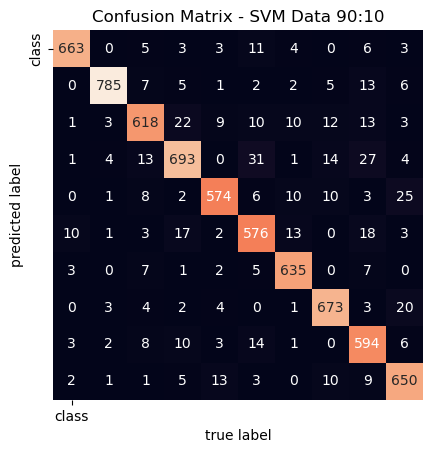

In [18]:
import seaborn as sns

# Bentuk confusion matrix SVM 
print("\nConfusion Matrix SVM (90:10):")
cnf_svm_3 = confusion_matrix_svm_linear_3
sns.heatmap(cnf_svm_3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion Matrix - SVM Data 90:10')
plt.show()

**Naive Bayes**

* Data 70:30

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes pada data pelatihan
y_train_pred_nb_1 = gnb1.predict(X_train_1)
accuracy_train_nb_1 = accuracy_score(y_train_1, y_train_pred_nb_1)

# Evaluasi model Naive Bayes pada data pengujian
accuracy_test_nb_1 = accuracy_score(y_test_1, y_pred_nb_1)

# Classification Report untuk model Naive Bayes pada data pengujian
report_nb_1 = classification_report(y_test_1, y_pred_nb_1)

# Confusion Matrix untuk model Naive Bayes pada data pengujian
confusion_matrix_nb_1 = confusion_matrix(y_test_1, y_pred_nb_1)

print(f'Akurasi Naive Bayes (data pelatihan): {accuracy_train_nb_1}= {accuracy_train_nb_1* 100:.2f}%')
print(f'Akurasi Naive Bayes (data pengujian): {accuracy_test_nb_1}= {accuracy_test_nb_1* 100:.2f}%')
print("\nClassification Report Naive Bayes:")
print(report_nb_1)


Akurasi Naive Bayes (data pelatihan): 0.5272040816326531= 52.72%
Akurasi Naive Bayes (data pengujian): 0.5264285714285715= 52.64%

Classification Report Naive Bayes:
              precision    recall  f1-score   support

           0       0.57      0.94      0.71      2058
           1       0.82      0.95      0.88      2364
           2       0.85      0.22      0.36      2133
           3       0.71      0.26      0.38      2176
           4       0.83      0.08      0.14      1936
           5       0.43      0.02      0.04      1915
           6       0.66      0.94      0.78      2088
           7       0.92      0.23      0.37      2248
           8       0.28      0.59      0.38      1992
           9       0.36      0.96      0.53      2090

    accuracy                           0.53     21000
   macro avg       0.64      0.52      0.45     21000
weighted avg       0.65      0.53      0.46     21000




Confusion Matrix Naive Bayes (70:30):


Text(113.9222222222222, 0.5, 'predicted label')

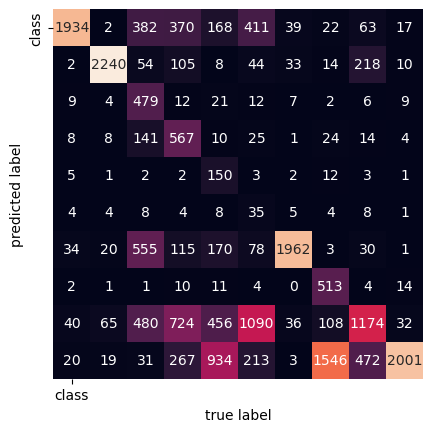

In [20]:
import seaborn as sns

# Bentuk confusion matrix
print("\nConfusion Matrix Naive Bayes (70:30):")
cnf1 = confusion_matrix_nb_1
sns.heatmap(cnf1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

* Data 80:20

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes pada data pelatihan
y_train_pred_nb_2 = gnb2.predict(X_train_2)
accuracy_train_nb_2 = accuracy_score(y_train_2, y_train_pred_nb_2)

# Evaluasi model Naive Bayes pada data pengujian
accuracy_test_nb_2 = accuracy_score(y_test_2, y_pred_nb_2)

# Classification Report untuk model Naive Bayes pada data pengujian
report_nb_2 = classification_report(y_test_2, y_pred_nb_2)

# Confusion Matrix untuk model Naive Bayes pada data pengujian
confusion_matrix_nb_2 = confusion_matrix(y_test_2, y_pred_nb_2)

print(f'Akurasi Naive Bayes (data pelatihan): {accuracy_train_nb_2}= {accuracy_train_nb_2* 100:.2f}%')
print(f'Akurasi Naive Bayes (data pengujian): {accuracy_test_nb_2}= {accuracy_test_nb_2* 100:.2f}%')
print("\nClassification Report Naive Bayes (80:20):")
print(report_nb_2)


Akurasi Naive Bayes (data pelatihan): 0.5261428571428571= 52.61%
Akurasi Naive Bayes (data pengujian): 0.525= 52.50%

Classification Report Naive Bayes (80:20):
              precision    recall  f1-score   support

           0       0.63      0.92      0.75      1343
           1       0.85      0.94      0.89      1600
           2       0.85      0.21      0.33      1380
           3       0.69      0.26      0.38      1433
           4       0.78      0.08      0.14      1295
           5       0.46      0.02      0.04      1273
           6       0.69      0.93      0.79      1396
           7       0.92      0.22      0.35      1503
           8       0.26      0.62      0.37      1357
           9       0.36      0.95      0.52      1420

    accuracy                           0.53     14000
   macro avg       0.65      0.51      0.46     14000
weighted avg       0.65      0.53      0.47     14000




Confusion Matrix Naive Bayes (80:20):


Text(113.9222222222222, 0.5, 'predicted label')

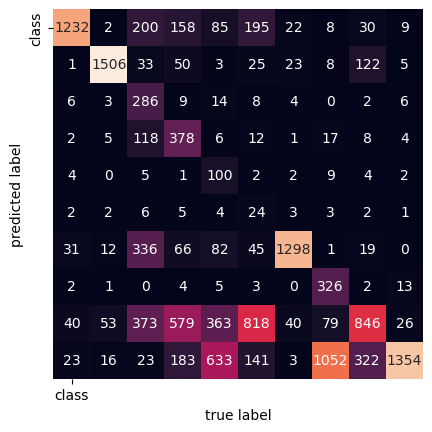

In [22]:
import seaborn as sns

# Bentuk confusion matrix
print("\nConfusion Matrix Naive Bayes (80:20):")
cnf2 = confusion_matrix_nb_2
sns.heatmap(cnf2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

* Data 90:10

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi model Naive Bayes pada data pelatihan
y_train_pred_nb_3 = gnb3.predict(X_train_3)
accuracy_train_nb_3 = accuracy_score(y_train_3, y_train_pred_nb_3)

# Evaluasi model Naive Bayes pada data pengujian
accuracy_test_nb_3 = accuracy_score(y_test_3, y_pred_nb_3)

# Classification Report untuk model Naive Bayes pada data pengujian
report_nb_3 = classification_report(y_test_3, y_pred_nb_3)

# Confusion Matrix untuk model Naive Bayes pada data pengujian
confusion_matrix_nb_3 = confusion_matrix(y_test_3, y_pred_nb_3)

print(f'Akurasi Naive Bayes (data pelatihan): {accuracy_train_nb_3}= {accuracy_train_nb_3* 100:.2f}%')
print(f'Akurasi Naive Bayes (data pengujian): {accuracy_test_nb_3}= {accuracy_test_nb_3* 100:.2f}%')
print("\nClassification Report Naive Bayes (90:10):")
print(report_nb_3)


Akurasi Naive Bayes (data pelatihan): 0.5327142857142857= 53.27%
Akurasi Naive Bayes (data pengujian): 0.5371428571428571= 53.71%

Classification Report Naive Bayes (90:10):
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       683
           1       0.84      0.95      0.89       800
           2       0.83      0.22      0.35       674
           3       0.70      0.28      0.40       760
           4       0.81      0.12      0.21       611
           5       0.50      0.02      0.04       658
           6       0.69      0.92      0.79       677
           7       0.91      0.25      0.39       724
           8       0.26      0.65      0.37       693
           9       0.39      0.95      0.55       720

    accuracy                           0.54      7000
   macro avg       0.66      0.53      0.48      7000
weighted avg       0.66      0.54      0.49      7000




Confusion Matrix Naive Bayes (90:10):


Text(113.9222222222222, 0.5, 'predicted label')

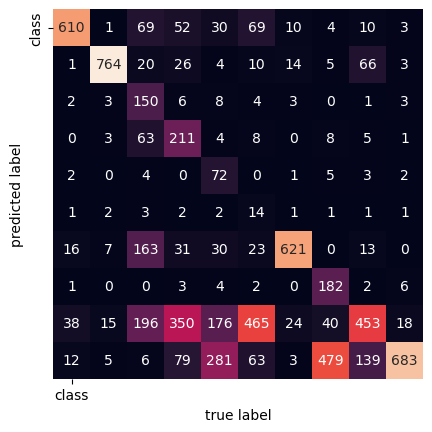

In [24]:
import seaborn as sns

# Bentuk confusion matrix
print("\nConfusion Matrix Naive Bayes (90:10):")
cnf3 = confusion_matrix_nb_3
sns.heatmap(cnf3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mnist.target_names,
            yticklabels=mnist.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Kuis Nomor 7 

7. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet
03 sebagai acuan.

**SVM**

* Data 70:30

Hasil SVM (70:30):


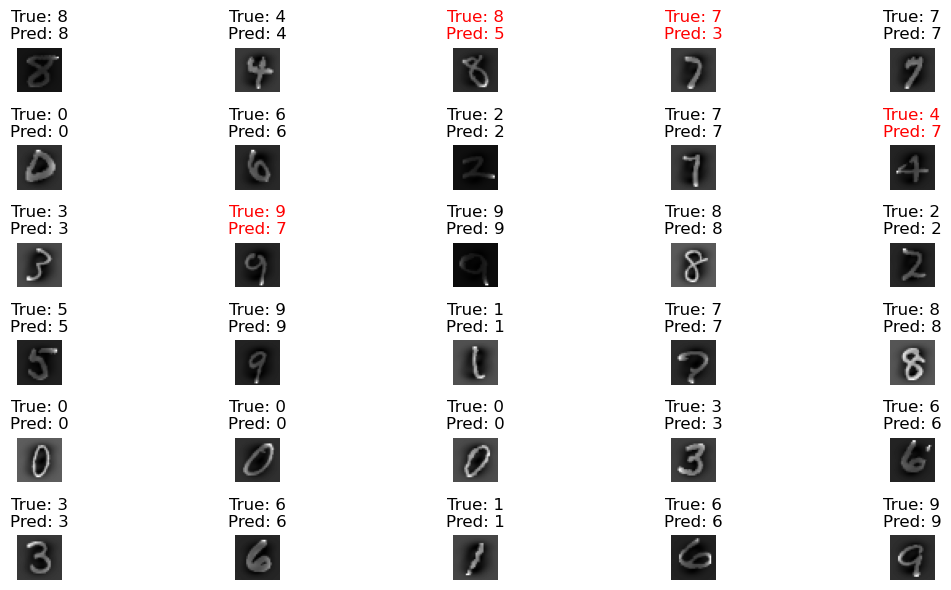

In [25]:
n_samples_to_display = 30 #menentukan banyal sampel citra yang akan ditampilkan 

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))#membuat plot 12x6 inch
for i in range(n_samples_to_display):#iterasi untuk menampilkan sampel citra 
    plt.subplot(6, 5, i + 1)#membuat subplot dalam figur, 6 baris 5 kolom dan i+1 engacu pada subplot ke-i
    
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_1[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_1.iloc[i] if isinstance(y_test_1, pd.Series) else y_test_1[i]#label asli untuk membandingkan dg label prediksi 
    pred_label = y_pred_1.iloc[i] if isinstance(y_pred_1, pd.Series) else y_pred_1[i]#label yang diprediksi 

    if true_label == pred_label:
        text_color = 'black'#warna akan hitam jika label asli sama dengan label prediksi
    else:
        text_color = 'red'#warna teks akan merah jika label asli tidak sama dengan label prediksi

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)#menampilkan judu diatas citra dengan label asli dan label prediksinya 
    plt.axis("off")#menghilangkan sumbu x dan y pada subplot

print("Hasil SVM (70:30):")
plt.tight_layout()#atur tataletal subplot supaya rapi 
plt.show()#menampilkan visualisasi citra dengan label asli dan label prediksinya 

* Data 80:20

Hasil SVM (80:20):


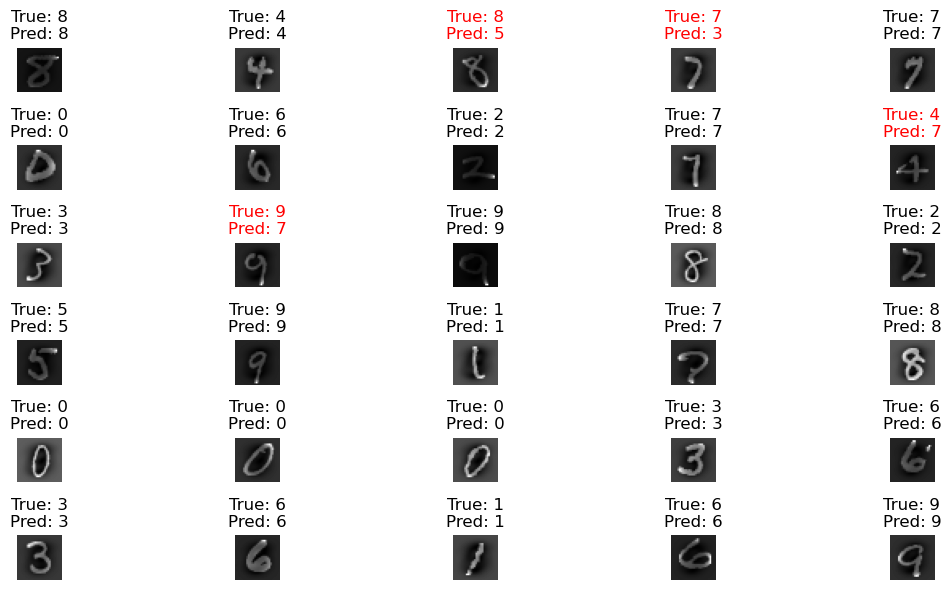

In [26]:
n_samples_to_display = 30

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_2[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_2.iloc[i] if isinstance(y_test_2, pd.Series) else y_test_2[i]
    pred_label = y_pred_2.iloc[i] if isinstance(y_pred_2, pd.Series) else y_pred_2[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

print("Hasil SVM (80:20):")
plt.tight_layout()
plt.show()

* Data 90:10

Hasil SVM (90:10):


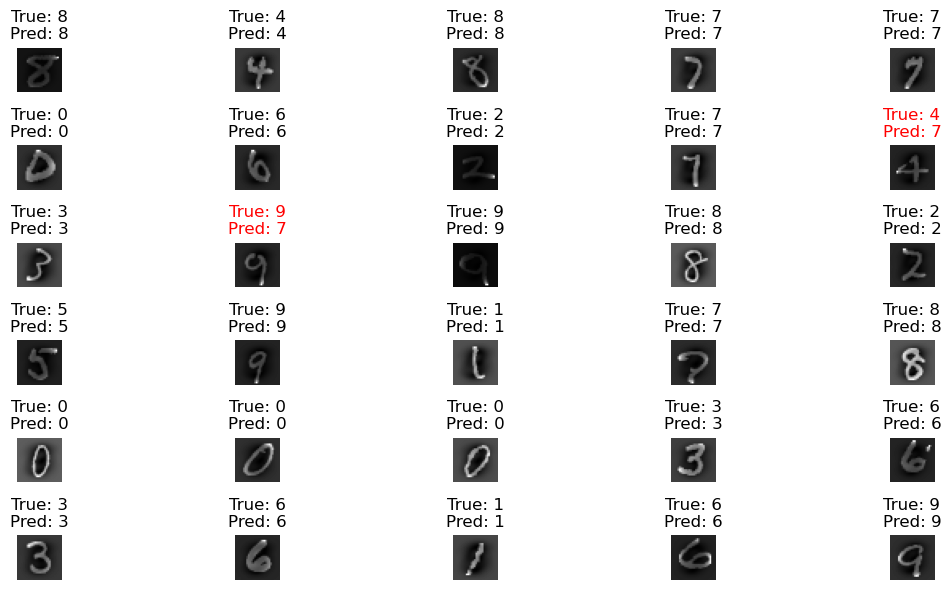

In [27]:
n_samples_to_display = 30

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_3[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_3.iloc[i] if isinstance(y_test_3, pd.Series) else y_test_3[i]
    pred_label = y_pred_3.iloc[i] if isinstance(y_pred_3, pd.Series) else y_pred_3[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

print("Hasil SVM (90:10):")
plt.tight_layout()
plt.show()

**Naive Bayes**

* Data 70:30

Hasil Naive Bayes (70:30):


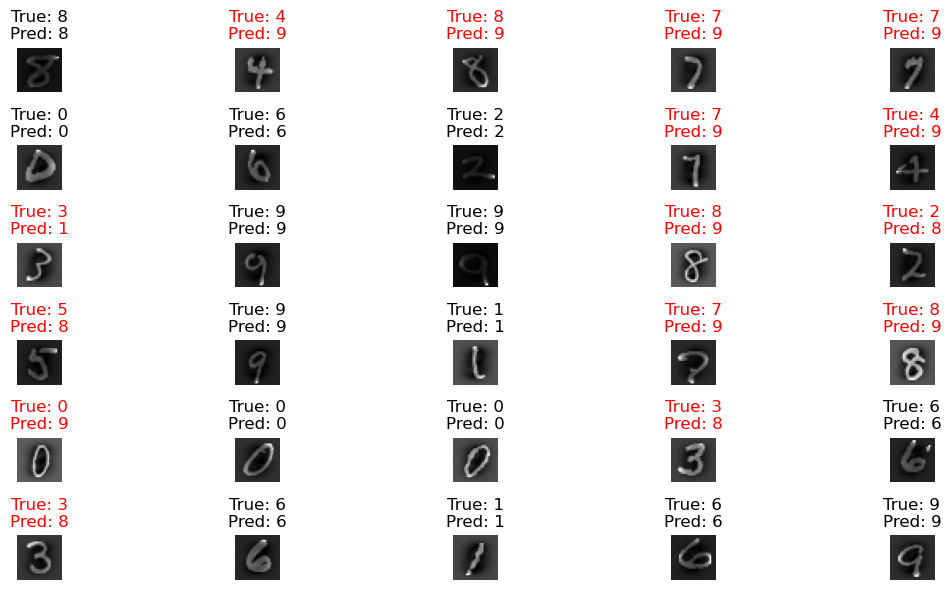

In [28]:
n_samples_to_display = 30

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_1[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_1.iloc[i] if isinstance(y_test_1, pd.Series) else y_test_1[i]
    pred_label = y_pred_nb_1.iloc[i] if isinstance(y_pred_nb_1, pd.Series) else y_pred_nb_1[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

print("Hasil Naive Bayes (70:30):")
plt.tight_layout()
plt.show()

* Data 80:20

Hasil Naive Bayes (80:20):


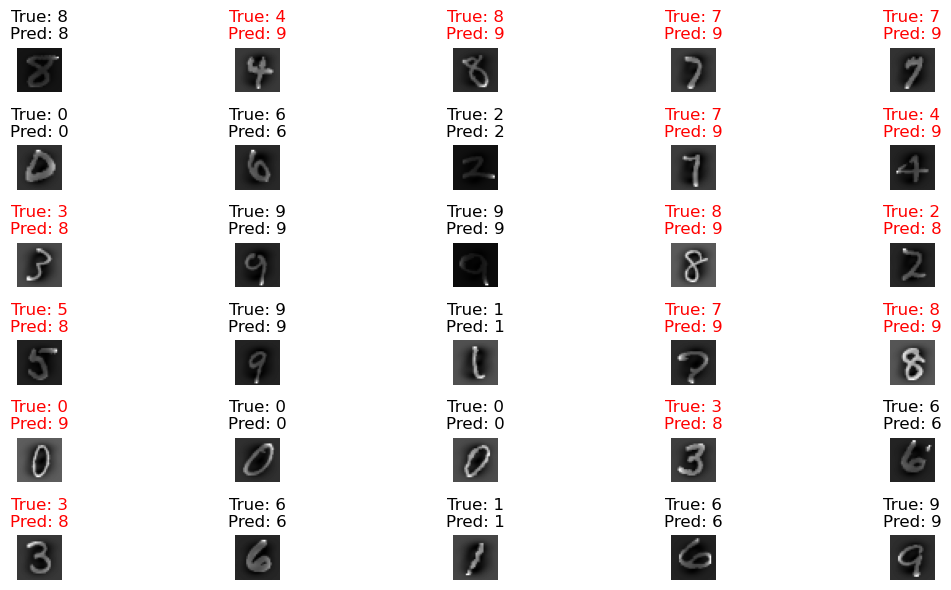

In [29]:
n_samples_to_display = 30

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_2[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_2.iloc[i] if isinstance(y_test_2, pd.Series) else y_test_2[i]
    pred_label = y_pred_nb_2.iloc[i] if isinstance(y_pred_nb_2, pd.Series) else y_pred_nb_2[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

print("Hasil Naive Bayes (80:20):")
plt.tight_layout()
plt.show()

* Data 90:10

Hasil Naive Bayes (90:10):


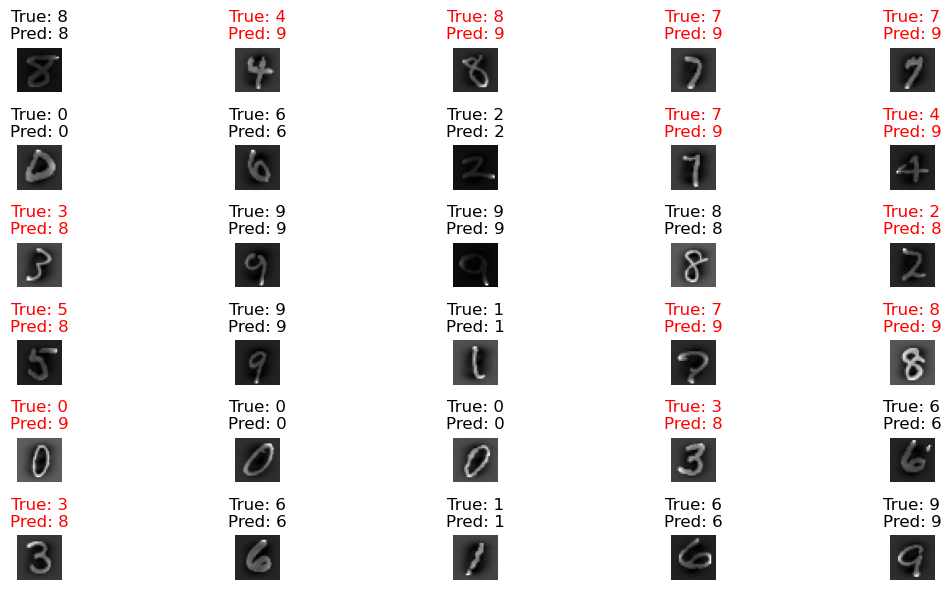

In [30]:
n_samples_to_display = 30

# Menampilkan citra dengan label asli dan label yang diprediksi
plt.figure(figsize=(12, 6))
for i in range(n_samples_to_display):
    plt.subplot(6, 5, i + 1)
    # Menampilkan citra dengan mengubahnya menjadi bentuk 28x28 piksel dengan skala abu-abu
    plt.imshow(X_test_3[i].reshape(28, 28), cmap="gray")

    # Menentukan warna teks berdasarkan label asli atau label yang diprediksi
    true_label = y_test_3.iloc[i] if isinstance(y_test_3, pd.Series) else y_test_3[i]
    pred_label = y_pred_nb_3.iloc[i] if isinstance(y_pred_nb_3, pd.Series) else y_pred_nb_3[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis("off")

print("Hasil Naive Bayes (90:10):")
plt.tight_layout()
plt.show()

# Kuis Nomor 8 

8. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi
yang didapatkan? Jelaskan!

Dari proses diatas didapatkah sebagai berikut : 
* Data dengan Rasion 70:30

    Akurasi SVM: 0.92= 92.00%

    Akurasi Naive Bayes: 0.5264285714285715= 52.64%

* Data dengan rasio 80:20 

    Akurasi SVM: 0 0.9210714285714285= 92.11%

    Akurasi Naive Bayes: 0.525= 52.50%

* Data dengan rasio 90:10 

    Akurasi SVM: 0.923= 92,30%

    Akurasi Naive Bayes:0.5371428571428571= 53.71%
    

Dengan tingkat akurasi yang lebih tinggi, SVM adalah model terbaik dalam semua konfigurasi rasio pembagian data. Konfigurasi terbaik adalah menggunakan rasio 90:10 dengan SVM dan menggunakan jenis kernel linear, yang memiliki akurasi sekitar 92.3%. 